### Edgar Moises Hernandez-Gonzalez
#### 20/01/20-04/03/20
#### Espectrograma con CWT de una señal de 4 segundos de EEG a 250Hz

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pywt

In [2]:
canal = pd.read_csv("MI-EEG-A01T.csv", header=None).iloc[:, 7000:8000] #canal C3
#canal = pd.read_csv("MI-EEG-A01T.csv", header=None).iloc[:, 11000:12000] #canal C4 (usar este)

FileNotFoundError: ignored

In [0]:
# Señal EEG del sujeto 1
# 4 segundos con fs=250Hz

fs = 250
time = np.arange(0, 4, 1/fs)
sig = canal.iloc[2] #la muestra 2 es mano derecha
sig.shape

(1000,)

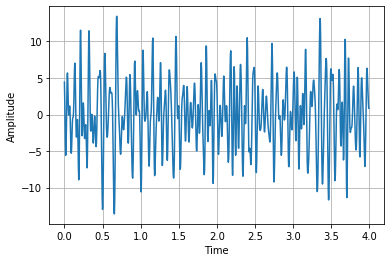

In [0]:
plt.plot(time, sig)
plt.grid()
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.show()

#### Morlet

In [0]:
frecuencias = pywt.scale2frequency('morl', [2,4,8,16,32,64,128,256,512,1024]) / (1/fs)
print("Frecuencias para diferentes escalas morl: \n", frecuencias)

Frecuencias para diferentes escalas morl: 
 [101.5625      50.78125     25.390625    12.6953125    6.34765625
   3.17382812   1.58691406   0.79345703   0.39672852   0.19836426]


In [0]:
coef, freqs = pywt.cwt(sig, np.arange(1,65), 'morl')

(64, 1000)


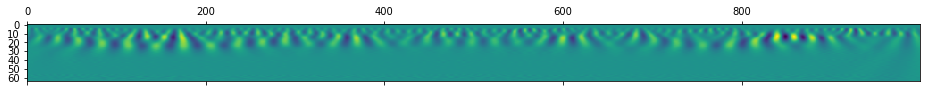

In [0]:
print(coef.shape)
plt.matshow(coef)
plt.show()

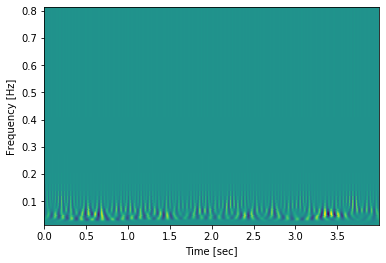

In [0]:
plt.pcolormesh(time, freqs, coef)
plt.xlabel('Time [sec]')
plt.ylabel('Frequency [Hz]')
plt.show()

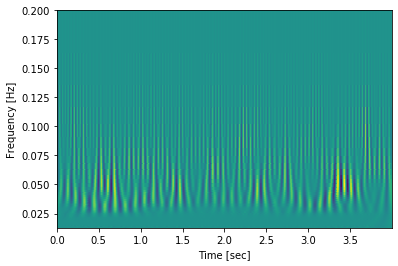

In [0]:
plt.pcolormesh(time, freqs, coef)
plt.axis([0, time[-1:], freqs[-1:], 0.2])
plt.xlabel('Time [sec]')
plt.ylabel('Frequency [Hz]')
plt.show()

CWT a escala de grises, esto es lo que se va a clasificar


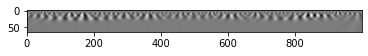

In [0]:
print("CWT a escala de grises, esto es lo que se va a clasificar")
plt.imshow(coef, cmap=plt.cm.binary)
plt.show()

In [0]:
print(freqs.shape)
print(freqs)

(64,)
[0.8125     0.40625    0.27083333 0.203125   0.1625     0.13541667
 0.11607143 0.1015625  0.09027778 0.08125    0.07386364 0.06770833
 0.0625     0.05803571 0.05416667 0.05078125 0.04779412 0.04513889
 0.04276316 0.040625   0.03869048 0.03693182 0.03532609 0.03385417
 0.0325     0.03125    0.03009259 0.02901786 0.02801724 0.02708333
 0.02620968 0.02539062 0.02462121 0.02389706 0.02321429 0.02256944
 0.02195946 0.02138158 0.02083333 0.0203125  0.01981707 0.01934524
 0.01889535 0.01846591 0.01805556 0.01766304 0.01728723 0.01692708
 0.01658163 0.01625    0.01593137 0.015625   0.01533019 0.0150463
 0.01477273 0.01450893 0.01425439 0.01400862 0.01377119 0.01354167
 0.01331967 0.01310484 0.01289683 0.01269531]


#### Complex Morlet

In [0]:
frecuencias = pywt.scale2frequency('cmor3-3', [2,4,8,16,32,64,128,256,512,1024]) / (1/fs)
print("Frecuencias para diferentes escalas cmor3-3: \n", frecuencias)

Frecuencias para diferentes escalas cmor3-3: 
 [375.         187.5         93.75        46.875       23.4375
  11.71875      5.859375     2.9296875    1.46484375   0.73242188]


In [0]:
coef, freqs = pywt.cwt(sig, np.arange(1,129), 'cmor3-3')

(128, 1000)


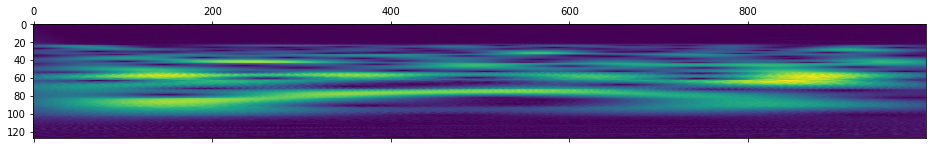

In [0]:
print(coef.shape)
plt.matshow(abs(coef))
plt.show()

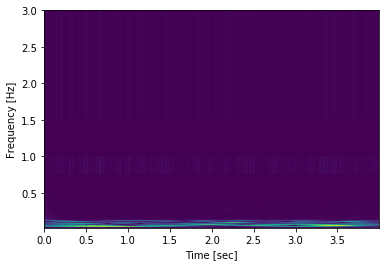

In [0]:
plt.pcolormesh(time, freqs, abs(coef))
plt.xlabel('Time [sec]')
plt.ylabel('Frequency [Hz]')
plt.show()

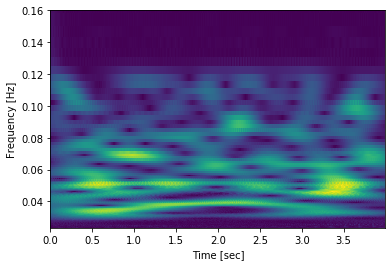

In [0]:
plt.pcolormesh(time, freqs, abs(coef))
plt.axis([0, time[-1:], freqs[-1:], 0.16])
plt.xlabel('Time [sec]')
plt.ylabel('Frequency [Hz]')
plt.show()

CWT a escala de grises, esto es lo que se va a clasificar


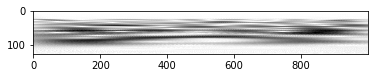

In [0]:
print("CWT a escala de grises, esto es lo que se va a clasificar")
plt.imshow(abs(coef), cmap=plt.cm.binary)
plt.show()

In [0]:
print(freqs.shape)
print(freqs)

(128,)
[3.         1.5        1.         0.75       0.6        0.5
 0.42857143 0.375      0.33333333 0.3        0.27272727 0.25
 0.23076923 0.21428571 0.2        0.1875     0.17647059 0.16666667
 0.15789474 0.15       0.14285714 0.13636364 0.13043478 0.125
 0.12       0.11538462 0.11111111 0.10714286 0.10344828 0.1
 0.09677419 0.09375    0.09090909 0.08823529 0.08571429 0.08333333
 0.08108108 0.07894737 0.07692308 0.075      0.07317073 0.07142857
 0.06976744 0.06818182 0.06666667 0.06521739 0.06382979 0.0625
 0.06122449 0.06       0.05882353 0.05769231 0.05660377 0.05555556
 0.05454545 0.05357143 0.05263158 0.05172414 0.05084746 0.05
 0.04918033 0.0483871  0.04761905 0.046875   0.04615385 0.04545455
 0.04477612 0.04411765 0.04347826 0.04285714 0.04225352 0.04166667
 0.04109589 0.04054054 0.04       0.03947368 0.03896104 0.03846154
 0.03797468 0.0375     0.03703704 0.03658537 0.03614458 0.03571429
 0.03529412 0.03488372 0.03448276 0.03409091 0.03370787 0.03333333
 0.03296703 0.0326087  